# Create Potential SNIIP List

Author: Melissa Graham & Midori Rollins

Identify potential type IIP supernovae from the "good" candidates created for all of the DDF.

To do this, we constrain the time spans, peak magnitudes, amplitudes, # of detections, decline slopes and decline times

Write the list of potential SNIIP to `potential_sniip_list.txt`.

Save the plot of every potential SNIIP lightcurve in the folder `all_potential_sniip_plots/`.

## Set up and read in data

In [15]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
# import pandas as pd

# from copy import deepcopy
import time

Colors to use for COSMOS-g, -r, -i and ELAIS-g, -r, -i

In [16]:
clr = ['darkgreen', 'firebrick', 'saddlebrown', 'limegreen', 'orange', 'lightcoral']

all_filters = ['g','r','i']
all_fcolors = ['green','red','blue']
all_fshapes = ['o','s','^']
all_fsizes  = [5, 5, 7]

In [17]:
fnm = '../all_nightly_epochs_files/candidate_lightcurves.dat'

candLC_field = np.loadtxt(fnm, dtype='str', usecols=(0))
candLC_candid = np.loadtxt(fnm, dtype='str', usecols=(1))
candLC_caldate = np.loadtxt(fnm, dtype='str', usecols=(2))
candLC_mjd = np.loadtxt(fnm, dtype='float', usecols=(3))
candLC_filter = np.loadtxt(fnm, dtype='str', usecols=(4))
candLC_Nobj = np.loadtxt(fnm, dtype='int', usecols=(5))
candLC_mag = np.loadtxt(fnm, dtype='float', usecols=(6))
candLC_mage = np.loadtxt(fnm, dtype='float', usecols=(7))
candLC_mrb = np.loadtxt(fnm, dtype='float', usecols=(8))
candLC_lef = np.loadtxt(fnm, dtype='float', usecols=(9))

del fnm

### Load the candidate lightcurves

In [18]:
fnm = '../all_nightly_epochs_files/candidate_lightcurve_parameters.dat'

paramLC_field = np.loadtxt( fnm, dtype='str', usecols=(0) )
paramLC_candid = np.loadtxt( fnm, dtype='str', usecols=(1) )
paramLC_tspan = np.loadtxt( fnm, dtype='float', usecols=(2) )
paramLC_tspan_g = np.loadtxt( fnm, dtype='float', usecols=(3) )
paramLC_tspan_r = np.loadtxt( fnm, dtype='float', usecols=(4) )
paramLC_tspan_i = np.loadtxt( fnm, dtype='float', usecols=(5) )
paramLC_minmag = np.loadtxt( fnm, dtype='float', usecols=(6) )
paramLC_minmag_g = np.loadtxt( fnm, dtype='float', usecols=(7) )
paramLC_minmag_r = np.loadtxt( fnm, dtype='float', usecols=(8) )
paramLC_minmag_i = np.loadtxt( fnm, dtype='float', usecols=(9) )
paramLC_amp = np.loadtxt( fnm, dtype='float', usecols=(10) )
paramLC_amp_g = np.loadtxt( fnm, dtype='float', usecols=(11) )
paramLC_amp_r = np.loadtxt( fnm, dtype='float', usecols=(12) )
paramLC_amp_i = np.loadtxt( fnm, dtype='float', usecols=(13) )
paramLC_neps = np.loadtxt( fnm, dtype='int', usecols=(14) )
paramLC_neps_g = np.loadtxt( fnm, dtype='int', usecols=(15) )
paramLC_neps_r = np.loadtxt( fnm, dtype='int', usecols=(16) )
paramLC_neps_i = np.loadtxt( fnm, dtype='int', usecols=(17) )

del fnm

## Identify potential SNe IIP

## Constrain the rise slopes & times

After reaching peak magnitude, SNIIP tend to remain a relatively consistent brightness for ~100 days or so before declining. We will thus implement a constraint where a candidate must decline by less than 3 magnitudes in the 100 days immediately after the observed peak brightness.

In [19]:
%%time

# define lists and arrays
gslope = []
rslope = []
islope = []
gdecline_time = []
rdecline_time = []
idecline_time = []
gmin_date = np.zeros(len(paramLC_candid))
rmin_date = np.zeros(len(paramLC_candid))
imin_date = np.zeros(len(paramLC_candid))

for i in range(len(paramLC_candid)):
    
    ### g band 
    # retrieve mjd date of the peak magnitude of each candidate in g-band
    gtx = (np.where((candLC_candid == paramLC_candid[i]) & (candLC_filter == 'g')))[0]
    if len(gtx) > 1: 
        gtx2 = np.where((candLC_candid == paramLC_candid[i]) & (candLC_filter == 'g') & (candLC_mag ==candLC_mag[gtx].min()))[0]
        gmin_date[i] = candLC_mjd[gtx2][0]
    gtx3 = np.where((candLC_candid == paramLC_candid[i]) & (candLC_filter == 'g') & (candLC_mjd >= gmin_date[i]))[0]
    if len(candLC_mag[gtx3]) > 1:
    # calculate decline time and decline slope in g-band
        gmjd_diff = []
        for j in range(len(candLC_mag[gtx3])):
            gmjd_diff.append(np.abs(candLC_mjd[gtx3][0]-candLC_mjd[gtx3][j])) # create list of mjd differences between peak and all following detections
        gind = min(range(len(gmjd_diff)), key=lambda k: abs(gmjd_diff[k]-100)) # get index of the mjd difference closest to 100 days
        gdecline_mag = candLC_mag[gtx3[gind]] - candLC_mag[gtx3[0]] # get change in mag between peak and detection closest to 100 days post peak
        gdecline_t = candLC_mjd[gtx3[gind]] - candLC_mjd[gtx3[0]] # get change in time between peak and detection closest to 100 days post peak
        gdecline_time.append(candLC_mjd[gtx3[gind]] - candLC_mjd[gtx3[0]])
        gslope.append(gdecline_mag/gdecline_t) # get decline slope
    else:
        gdecline_mag = -99.0
        gdecline_time.append(-99.0)
        gslope.append(99.0)
        
    ### r band
    # retrieve mjd date of the peak magnitude of each candidate in r-band
    rtx = (np.where((candLC_candid == paramLC_candid[i]) & (candLC_filter == 'r')))[0]
    if len(rtx) > 1: 
        rtx2 = np.where((candLC_candid == paramLC_candid[i]) & (candLC_filter == 'r') & (candLC_mag ==candLC_mag[rtx].min()))[0]
        rmin_date[i] = candLC_mjd[rtx2][0]
    rtx3 = np.where((candLC_candid == paramLC_candid[i]) & (candLC_filter == 'r') & (candLC_mjd >= rmin_date[i]))[0]
    if len(candLC_mag[rtx3]) > 1:
    # calculate decline time and decline slope in r-band
        rmjd_diff = []
        for j in range(len(candLC_mag[rtx3])):
            rmjd_diff.append(np.abs(candLC_mjd[rtx3][0]-candLC_mjd[rtx3][j])) # create list of mjd differences between peak and all following detections
        rind = min(range(len(rmjd_diff)), key=lambda k: abs(rmjd_diff[k]-100)) # get index of the mjd difference closest to 100 days
        rdecline_mag = candLC_mag[rtx3[rind]] - candLC_mag[rtx3[0]] # get change in mag between peak and detection closest to 100 days post peak
        rdecline_t = candLC_mjd[rtx3[rind]] - candLC_mjd[rtx3[0]] # get change in time between peak and detection closest to 100 days post peak
        rdecline_time.append(candLC_mjd[rtx3[rind]] - candLC_mjd[rtx3[0]])
        rslope.append(rdecline_mag/rdecline_t) # get decline slope
    else:
        rdecline_mag = -99.0
        rdecline_time.append(-99.0)
        rslope.append(99.0)
    
    ### i band
    # retrieve mjd date of the peak magnitude of each candidate in i-band
    itx = (np.where((candLC_candid == paramLC_candid[i]) & (candLC_filter == 'i')))[0]
    if len(itx) > 1: 
        itx2 = np.where((candLC_candid == paramLC_candid[i]) & (candLC_filter == 'i') & (candLC_mag ==candLC_mag[itx].min()))[0]
        imin_date[i] = candLC_mjd[itx2][0]
    itx3 = np.where((candLC_candid == paramLC_candid[i]) & (candLC_filter == 'i') & (candLC_mjd >= imin_date[i]))[0]
    if len(candLC_mag[itx3]) > 1:
    # calculate decline time and decline slope in i-band
        imjd_diff = []
        for j in range(len(candLC_mag[itx3])):
            imjd_diff.append(np.abs(candLC_mjd[itx3][0]-candLC_mjd[itx3][j])) # create list of mjd differences between peak and all following detections
        iind = min(range(len(imjd_diff)), key=lambda k: abs(imjd_diff[k]-100)) # get index of the mjd difference closest to 100 days
        idecline_mag = candLC_mag[itx3[iind]] - candLC_mag[itx3[0]] # get change in mag between peak and detection closest to 100 days post peak
        idecline_t = candLC_mjd[itx3[iind]] - candLC_mjd[itx3[0]] # get change in time between peak and detection closest to 100 days post peak
        idecline_time.append(candLC_mjd[itx3[iind]] - candLC_mjd[itx3[0]])
        islope.append(idecline_mag/idecline_t) # get decline slope
    else:
        idecline_mag = -99.0
        idecline_time.append(-99.0)
        islope.append(99.0)
        
gslope = np.array(gslope)
rslope = np.array(rslope)
islope = np.array(islope)
gdecline_time = np.array(gdecline_time)
rdecline_time = np.array(rdecline_time)
idecline_time = np.array(idecline_time)

del gtx, gtx2, gtx3
del rtx, rtx2, rtx3
del itx, itx2, itx3

<timed exec>:52: RuntimeWarning: invalid value encountered in scalar divide
<timed exec>:74: RuntimeWarning: invalid value encountered in scalar divide
<timed exec>:30: RuntimeWarning: invalid value encountered in scalar divide


CPU times: user 1min 52s, sys: 11.7 ms, total: 1min 52s
Wall time: 1min 52s


## Identify potential SNIIP
We constrain the timespans, peak magnitudes, amplitudes, # of detections,  decline times, and decline slopes:
 * Long timespan (50 to 150 days) in **every filter**
 * Reaches a peak of at least 22 mag in **any filter**
 * Has an amplitude of 3 mag or less in **any filter**
 * Has at least 20 total detections
 * Post peak, declines in brightness with a slope of less than 3 mags/100 days in at least **2 filters**
 * Post peak, declines in brightness in more than 60 days in at least **2 filters**

If a candidate satisfies all the above constraints, we deem it a potential SNIIP.

In [20]:
paramLC_potsniip = np.zeros( len(paramLC_field), dtype='int' )

tx = np.where((((paramLC_tspan_g >= 50) & (paramLC_tspan_g <= 150)) &
              ((paramLC_tspan_r >= 50) & (paramLC_tspan_r <= 150)) & 
              ((paramLC_tspan_i >= 50) & (paramLC_tspan_i <= 150))) &
              ((paramLC_minmag_g < 22) | (paramLC_minmag_r < 22) | (paramLC_minmag_i < 22)) &
              ((paramLC_amp_g <= 3) | (paramLC_amp_r <= 3) | (paramLC_amp_i <= 3)) &
              ((paramLC_neps >= 20)))[0]

for t in tx:
    cntr = 0
    if (gslope[t] <= 3/100) & (gdecline_time[t] >= 60):
        cntr += 1
    if (rslope[t] <= 3/100) & (rdecline_time[t] >= 60):
        cntr += 1
    if (islope[t] <= 3/100) & (idecline_time[t] >= 60):
        cntr += 1

    if (cntr == 2) | (cntr == 3):
        paramLC_potsniip[t] = 1
    
    del cntr
del tx

tx = np.where( (paramLC_potsniip == 1) & (paramLC_field == 'COSMOS') )[0]
print('Number of potential SNIIP in COSMOS: ',len(tx))
print(paramLC_candid[tx])
del tx

tx = np.where( (paramLC_potsniip == 1) & (paramLC_field == 'ELAIS') )[0]
print('Number of potential SNIIP in ELAIS: ',len(tx))
print(paramLC_candid[tx])
del tx

Number of potential SNIIP in COSMOS:  4
['DC21bezt' 'DC23jmszp' 'DC23kgbgx' 'DC23kgxwc']
Number of potential SNIIP in ELAIS:  1
['DC22hxfqh']


### Write the list of potential SNIIP to file

In [21]:
fout = open('potential_sniip_list.dat', 'w')
tx = np.where(paramLC_potsniip == 1)[0]
for x in tx:
    fout.write(paramLC_candid[x]+'\n')
fout.close()
print('Number of potential SNIIP: ', len(tx))
del tx

Number of potential SNIIP:  5


### Plot the potential SNIIP lightcurves

Display the time span and decline slope in the upper left corner.

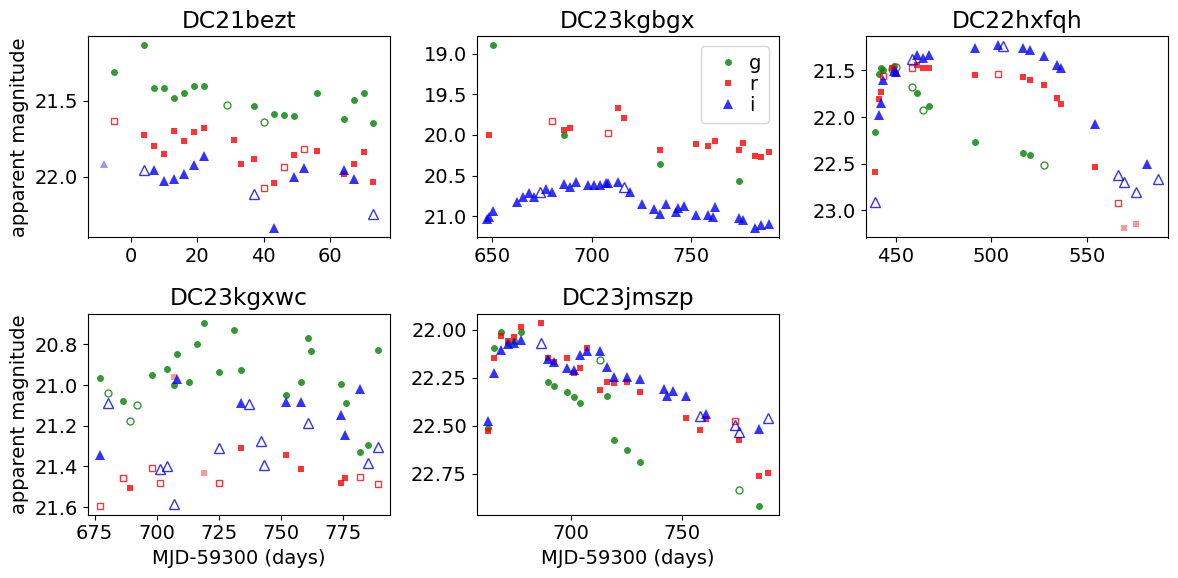

In [26]:
sx = np.where(paramLC_potsniip == 1)[0]
np.random.shuffle(sx)

fig, ax = plt.subplots( 2, 3, figsize=(12,6), sharex=False, sharey=False )

s = 0
for i in range(2):
    ax[i, 0].set_ylabel('apparent magnitude', fontsize=14)
    for j in range(3):
        if s <= 4:
            for f,filt in enumerate(all_filters):
                cx0 = np.where((candLC_candid == paramLC_candid[sx[s]]) & \
                               (candLC_filter == filt) & (candLC_mrb > 0.4))[0]
                cx1 = np.where((candLC_candid == paramLC_candid[sx[s]]) & \
                               (candLC_filter == filt) & (candLC_mrb <= 0.4) & (candLC_lef == 0))[0]
                cx2 = np.where((candLC_candid == paramLC_candid[sx[s]]) & \
                               (candLC_filter == filt) & (candLC_mrb <= 0.4) & (candLC_lef == 1))[0]
                ax[i, j].plot(candLC_mjd[cx0]-59300., candLC_mag[cx0], 
                             all_fshapes[f], ms=all_fsizes[f], mew=0, alpha=0.8, color=all_fcolors[f], label=filt)
                ax[i, j].plot(candLC_mjd[cx1]-59300., candLC_mag[cx1], 
                             all_fshapes[f], ms=all_fsizes[f], mew=1, alpha=0.8, color='none', mec=all_fcolors[f])
                ax[i, j].plot(candLC_mjd[cx2]-59300., candLC_mag[cx2], 
                             all_fshapes[f], ms=all_fsizes[f]-1, mew=0, alpha=0.4, color=all_fcolors[f])
            cx = np.where(candLC_candid == paramLC_candid[sx[s]])[0]
            xmin = np.min(candLC_mjd[cx])
            xmax = np.max(candLC_mjd[cx])
            ax[i, j].invert_yaxis()
            ax[i, j].set_xlim([xmin-59300.-5, xmax-59300.+5])
            del xmin, xmax
            ax[i, j].set_title(paramLC_candid[sx[s]])
            s += 1
            
# delete empty subplots
fig.delaxes(ax[1,2])

ax[0,1].legend(loc='upper right', labelspacing=0.1, handletextpad=0.1, fontsize=14)

for j in range(2):
    ax[1,j].set_xlabel('MJD-59300 (days)', fontsize=14)

plt.tight_layout()
plt.show()
del sx, s

Only DC23jmszp and DC22hxfqh look transient-like. Let's take a closer look at their lightcurves.

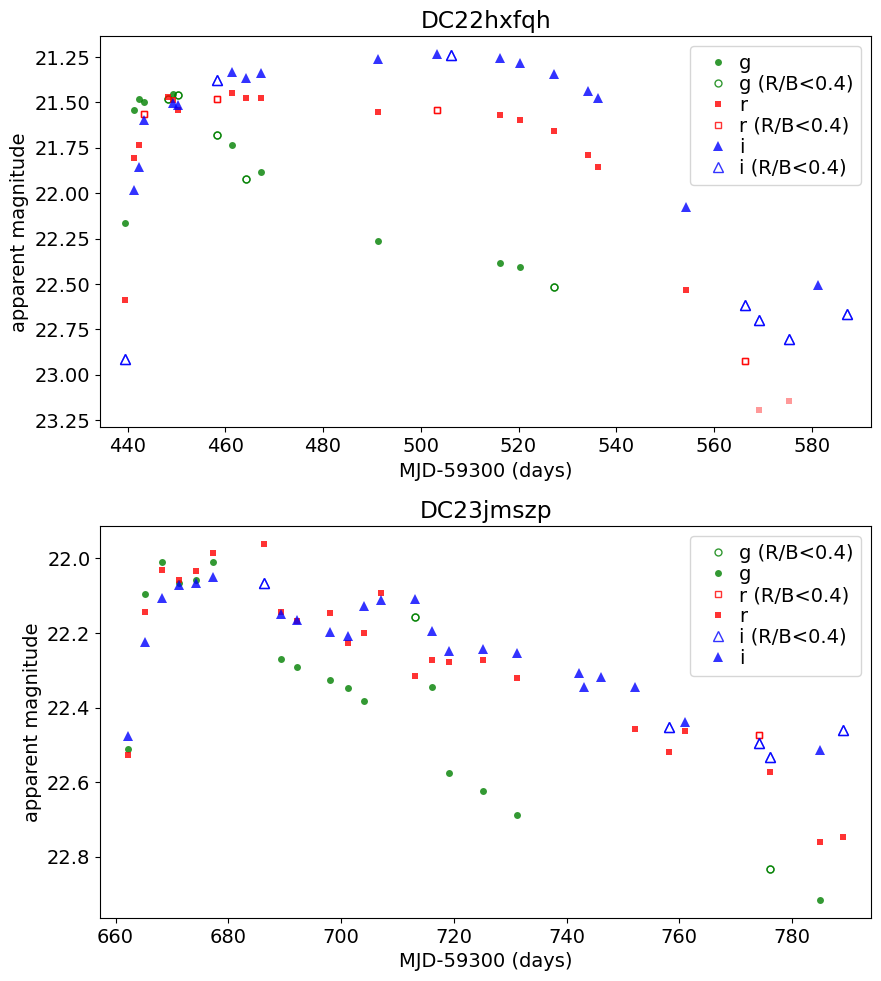

In [27]:
sx = np.where(paramLC_potsniip == 1)[0]
np.random.shuffle(sx)

fig, ax = plt.subplots( 2, 1, figsize=(9,10), sharex=False, sharey=False )

for f,filt in enumerate(all_filters):
    cx0 = np.where((candLC_candid == 'DC22hxfqh') & \
                   (candLC_filter == filt) & (candLC_mrb > 0.4))[0]
    cx1 = np.where((candLC_candid == 'DC22hxfqh') & \
                   (candLC_filter == filt) & (candLC_mrb <= 0.4) & (candLC_lef == 0))[0]
    cx2 = np.where((candLC_candid == 'DC22hxfqh') & \
                   (candLC_filter == filt) & (candLC_mrb <= 0.4) & (candLC_lef == 1))[0] 
    ax[0].plot(candLC_mjd[cx0]-59300., candLC_mag[cx0], 
             all_fshapes[f], ms=all_fsizes[f], mew=0, alpha=0.8, color=all_fcolors[f], label=filt)
    ax[0].plot(candLC_mjd[cx1]-59300., candLC_mag[cx1], 
             all_fshapes[f], ms=all_fsizes[f], mew=1, alpha=0.8, color='none', mec=all_fcolors[f])
    ax[0].plot(candLC_mjd[cx2]-59300., candLC_mag[cx2], 
             all_fshapes[f], ms=all_fsizes[f]-1, mew=0, alpha=0.4, color=all_fcolors[f])
    ax[0].plot(candLC_mjd[cx1]-59300., candLC_mag[cx1], 
             all_fshapes[f], ms=all_fsizes[f], mew=1, alpha=0.8, color='none', mec=all_fcolors[f], 
             label=filt+' (R/B<0.4)')
    cx = np.where(candLC_candid == 'DC22hxfqh')[0]
    xmin = np.min(candLC_mjd[cx])
    xmax = np.max(candLC_mjd[cx])
    ax[0].invert_yaxis()
    ax[0].set_xlim([xmin-59300.-5, xmax-59300.+5])
    del xmin, xmax
    ax[0].set_title('DC22hxfqh')
    ax[0].legend(loc='upper right', labelspacing=0.1, handletextpad=0.1, fontsize=14)
    ax[0].set_xlabel('MJD-59300 (days)', fontsize=14)
    ax[0].set_ylabel('apparent magnitude', fontsize=14)
    
    del cx, cx0, cx1, cx2
    cx0 = np.where((candLC_candid == 'DC23jmszp') & \
                   (candLC_filter == filt) & (candLC_mrb > 0.4))[0]
    cx1 = np.where((candLC_candid == 'DC23jmszp') & \
                   (candLC_filter == filt) & (candLC_mrb <= 0.4) & (candLC_lef == 0))[0]
    cx2 = np.where((candLC_candid == 'DC23jmszp') & \
                   (candLC_filter == filt) & (candLC_mrb <= 0.4) & (candLC_lef == 1))[0]
    ax[1].plot(candLC_mjd[cx1]-59300., candLC_mag[cx1], 
             all_fshapes[f], ms=all_fsizes[f], mew=1, alpha=0.8, color='none', mec=all_fcolors[f], 
             label=filt+' (R/B<0.4)')
    ax[1].plot(candLC_mjd[cx0]-59300., candLC_mag[cx0], 
             all_fshapes[f], ms=all_fsizes[f], mew=0, alpha=0.8, color=all_fcolors[f], label=filt)
    ax[1].plot(candLC_mjd[cx1]-59300., candLC_mag[cx1], 
             all_fshapes[f], ms=all_fsizes[f], mew=1, alpha=0.8, color='none', mec=all_fcolors[f])
    ax[1].plot(candLC_mjd[cx2]-59300., candLC_mag[cx2], 
             all_fshapes[f], ms=all_fsizes[f]-1, mew=0, alpha=0.4, color=all_fcolors[f])
    cx = np.where(candLC_candid == 'DC23jmszp')[0]
    xmin = np.min(candLC_mjd[cx])
    xmax = np.max(candLC_mjd[cx])
    ax[1].invert_yaxis()
    ax[1].set_xlim([xmin-59300.-5, xmax-59300.+5])
    del xmin, xmax
    ax[1].set_title('DC23jmszp')
    ax[1].legend(loc='upper right', labelspacing=0.1, handletextpad=0.1, fontsize=14)
    ax[1].set_xlabel('MJD-59300 (days)', fontsize=14)
    ax[1].set_ylabel('apparent magnitude', fontsize=14)
    # plt.subplots_adjust(bottom=0.1, top=0.9, wspace=0.2, hspace=0.4)
    
plt.tight_layout(pad=1.0)
plt.savefig('all_potential_sniip_plots/DC22hxfqh_DC23jmszp.png')
del sx

DC22hxfqh looks like a real potential SNIIP, remaining relatively constant in magnitude for ~100 days immediately after reaching the peak, the proceeds to decline. DC23jmszp actually looks SNIIn-like, exibiting a second peak in brightness.

### Plot slope lines for the potential fast transient, DC22hxfqh, lightcurve

We ensure the calculated rise slope matches the lightcurve data.

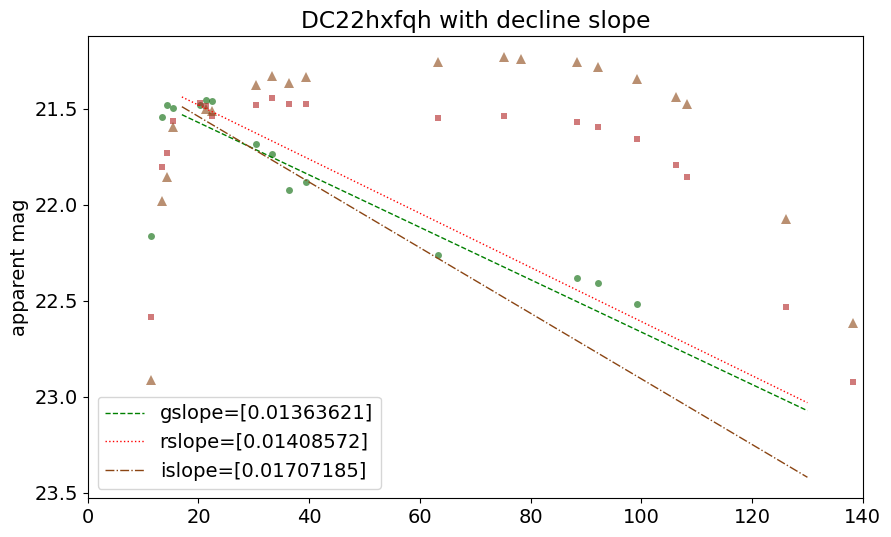

In [28]:
# sx = np.where(paramLC_potsniip == 1)[0]
sx = np.where(paramLC_candid == 'DC22hxfqh')

gsx = np.where((candLC_candid == paramLC_candid[sx][0]) & (candLC_filter == 'g'))
rsx = np.where((candLC_candid == paramLC_candid[sx][0]) & (candLC_filter == 'r'))
isx = np.where((candLC_candid == paramLC_candid[sx][0]) & (candLC_filter == 'i'))
plt.figure(figsize=(10,6))

plt.plot(candLC_mjd[gsx]-59728., candLC_mag[gsx], all_fshapes[0], ms=all_fsizes[0], mew=0, alpha=0.6, color=clr[0])
plt.plot(candLC_mjd[rsx]-59728., candLC_mag[rsx], all_fshapes[1], ms=all_fsizes[1], mew=0, alpha=0.6, color=clr[1])
plt.plot(candLC_mjd[isx]-59728., candLC_mag[isx], all_fshapes[2], ms=all_fsizes[2], mew=0, alpha=0.6, color=clr[2])
del gsx, rsx, isx

x = np.linspace(17,130, 2)
gy = [(gslope[sx]*(i))+ 21.3 for i in x]
ry = [(rslope[sx]*(i))+ 21.2 for i in x]
iy = [(islope[sx]*(i))+ 21.2 for i in x]

plt.plot(x, gy, c='green', lw=1, ls='dashed', label =f'gslope={gslope[sx]}')
plt.plot(x, ry, c='red', lw=1, ls='dotted', label =f'rslope={rslope[sx]}')
plt.plot(x, iy, c='saddlebrown', lw=1, ls='dashdot', label =f'islope={islope[sx]}')
del x, gy, ry, iy, sx

plt.ylabel('apparent mag')
plt.title('DC22hxfqh with decline slope')
plt.xlim(0, 140)

plt.gca().invert_yaxis()
plt.legend()
plt.show()

Due to the rise in i-band magnitude after the "real" peak, islope is calculated incorrectly. This also brings up the issue that if there are any points post peak that have a brighter/lower magnitude, slope will be calculated from that point and ~100 days after then, which could be greater than 100 days post "real" peak. I wonder if this issue is severe enough to be omitting many other real type IIP supernovae from our final list.

### Save individual plots as PNG files

In [29]:
sx = np.where(paramLC_potsniip == 1)[0]
plt.rcParams.update({'font.size': 14})

for x in range(len(sx)):
    plt.figure(figsize=(8,6))
    
    for f,filt in enumerate(all_filters):
        cx0 = np.where((candLC_candid == paramLC_candid[sx[x]]) & \
                       (candLC_filter == filt) & (candLC_mrb > 0.4))[0]
        cx1 = np.where((candLC_candid == paramLC_candid[sx[x]]) & \
                       (candLC_filter == filt) & (candLC_mrb <= 0.4) & (candLC_lef == 0))[0]
        cx2 = np.where((candLC_candid == paramLC_candid[sx[x]]) & \
                       (candLC_filter == filt) & (candLC_mrb <= 0.4) & (candLC_lef == 1))[0]
        plt.plot(candLC_mjd[cx0]-59300., candLC_mag[cx0], 
                 all_fshapes[f], ms=all_fsizes[f], mew=0, alpha=0.8, color=all_fcolors[f], label=filt)
        plt.plot(candLC_mjd[cx1]-59300., candLC_mag[cx1], 
                 all_fshapes[f], ms=all_fsizes[f], mew=1, alpha=0.8, color='none', mec=all_fcolors[f], 
                 label=filt+' (R/B<0.4)')
        plt.plot(candLC_mjd[cx2]-59300., candLC_mag[cx2], 
                 all_fshapes[f], ms=all_fsizes[f]-1, mew=0, alpha=0.4, color=all_fcolors[f])
    cx = np.where(candLC_candid == paramLC_candid[sx[x]])[0]
    xmin = np.min(candLC_mjd[cx])
    xmax = np.max(candLC_mjd[cx])
    del cx
    plt.gca().invert_yaxis()
    plt.title(paramLC_candid[sx[x]])
    plt.legend(loc='best', labelspacing=0.1, handletextpad=0.1, fontsize=14)
    plt.xlim([xmin-59300.-5, xmax-59300.+5])
    del xmin, xmax
    plt.xlabel('MJD-59300 (days)', fontsize=14)
    plt.ylabel('apparent magnitude', fontsize=14)
    plt.savefig('all_potential_sniip_plots/'+paramLC_candid[sx[x]]+'.png')
    plt.close()

del sx